Creating Really Baby Neural Network

In [1]:
weight = 0.1

In [4]:
#an empty network 
def neural_network(input, weight):
    prediction = input * weight 
    return prediction

In [5]:
#inserting one input datapoint 

number_of_toes = [8.5, 9.5, 10, 9]
input = number_of_toes[0]
pred = neural_network(input, weight)
print(pred)

0.8500000000000001


# How does the network learn?
Trial and error! First, it tries to make a prediction. Then, it sees whether it was
too high or too low. Finally, it changes the weight (up or down) to predict more
accurately the next time it sees the same input.

# Making a Prediction with Multiple Inputs

What if we were able to give our network more information (at one time) than just the "average number of
toes". It should, in theory, be able to make more accurate predictions, yes?

1) An Empty Network With Multiple Inputs

In [14]:
weights = [0.1, 0.2, 0]

def neural_network(input, weights):
    
    pred = w_sum(input, weights)
    return pred 

2) Perform a Weighted Sum of Inputs

In [20]:
def w_sum(a, b):
    assert(len(a) == len(b))
    output = 0 
    for i in range(len(a)):
        output += (a[i] * b[i])
    return output

3) Inserting One Input Datapoint

-> This dataset is the current
status at the beginning of
each game for the first 4 games
in a season.

toes = current number of toes

wlrec = current games won (percent)

nfans = fan count (in millions) 

In [21]:
toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

# input corresponds to every entry
# for the first game of the season

input = [toes[0], wlrec[0], nfans[0]]
pred = neural_network(input, weights)
print(pred)

0.9800000000000001


4) Deposit Prediction

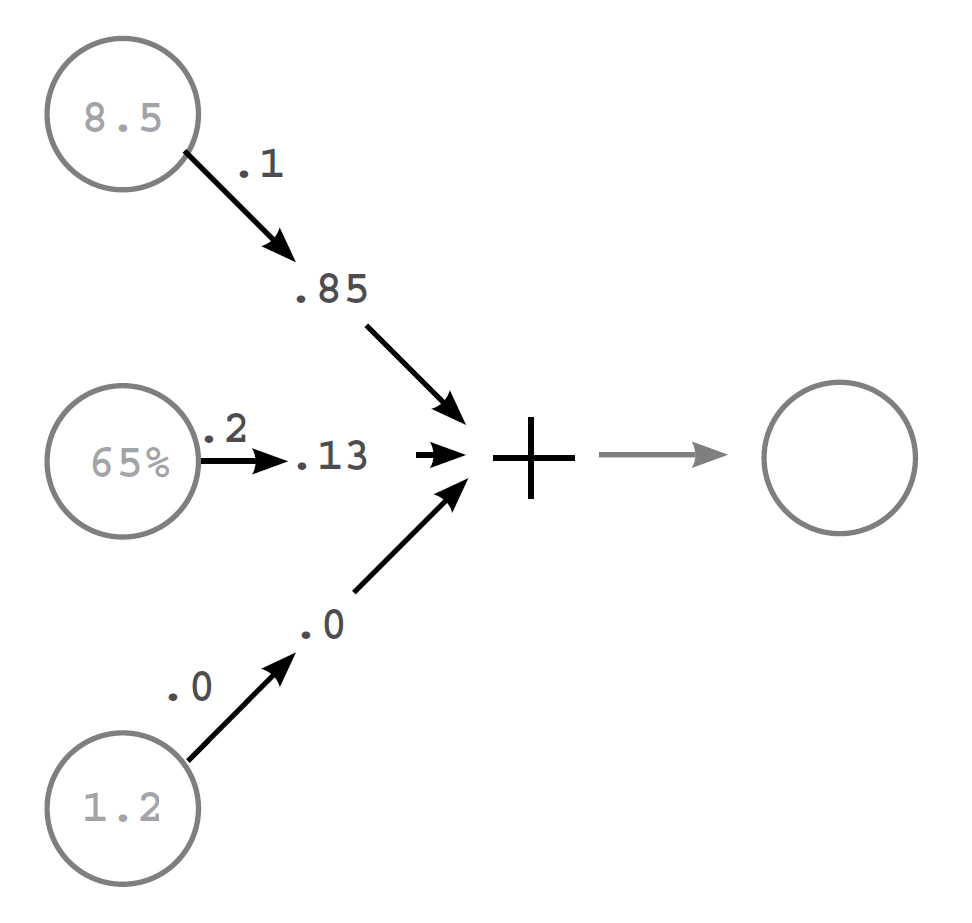

In [22]:
from IPython import display
display.Image("./neural1.png")

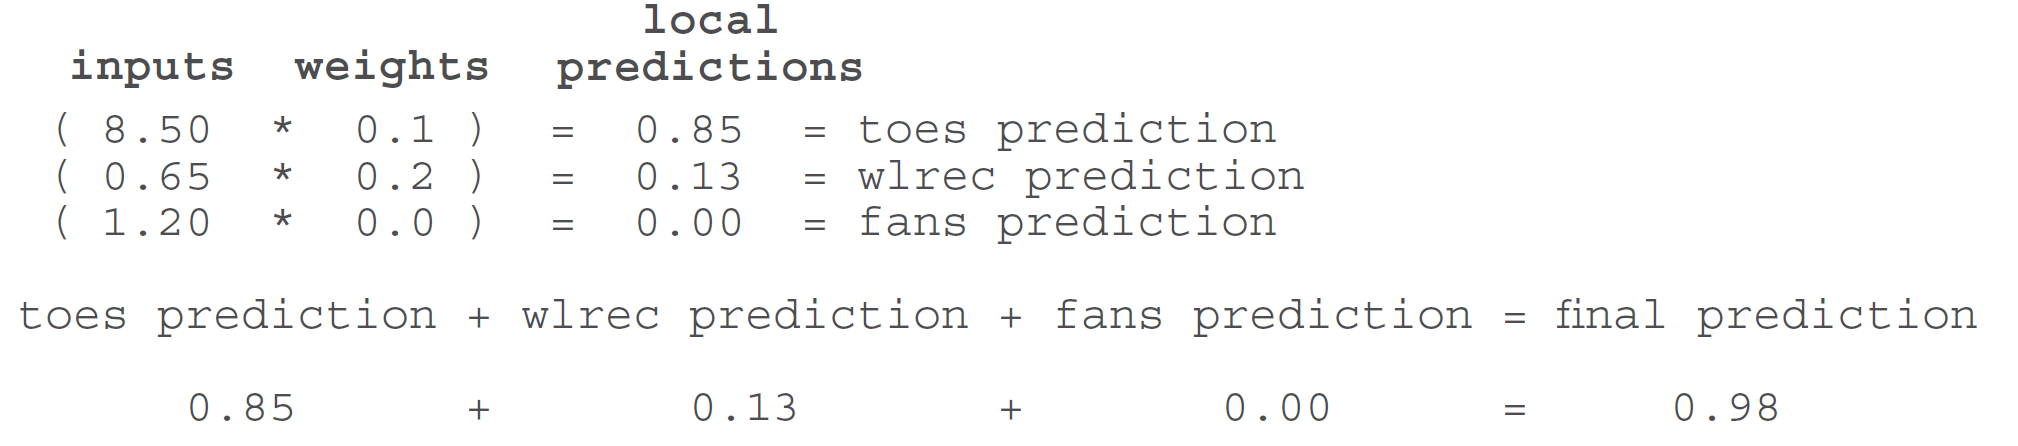

In [23]:
display.Image("./neural2.png")

# Multiple Inputs - What does this Neural Network do?
It multiplies 3 inputs by 3 knob_weights and sums them. This is a "weighted sum".

The interface for our neural network is quite simple. It accepts an input variable
as information, and a weight variable as knowledge and outputs a prediction.

# Making a Prediction with Multiple Outputs

Neural Networks can also make multiple predictions using only a single input.

-> instead of predicting just
whether the team won or lost,
now we're also predicting whether
they are happy/sad AND the percentage
of the team that is hurt. We are
making this prediction using only
the current win/loss record

1) An Empty Network With Multiple Outputs

In [33]:
weights = [0.3, 0.2, 0.9]

def neural_network(input, weights):
    
    pred = ele_mul(input, weights)
    return pred

2) Inserting One Input Datapoint

In [34]:
wlrec = [0.65, 0.8, 0.8, 0.9]
input = wlrec[0]

3) Perform an Elementwise Multiplication

In [35]:
def ele_mul(number, vector):
    output = [0, 0, 0]
    assert(len(output) == len(vector))
    
    for i in range(len(vector)):
        output[i] = number * vector[i]
        
    return output

In [38]:
pred = neural_network(input, weights)
print(pred)

[0.195, 0.13, 0.5850000000000001]


# Predicting with Multiple Inputs & Outputs

-> Just like before, we simply have a weight connecting each input node to each output node and prediction occurs in the usual way.

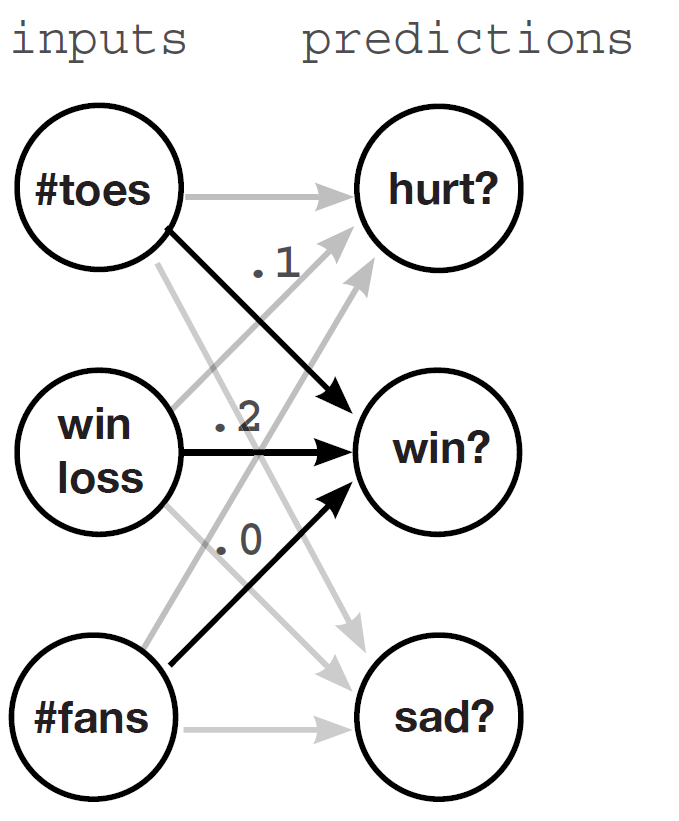

In [39]:
display.Image("./neural3.png")

In [80]:
#toes %win #fans
weights = [ 
            [0.1, 0.1, -0.3],#hurt?
            [0.1, 0.2, 0.0], #win?
            [0.0, 1.3, 0.1] #sad?
          ]

1) An Empty Network With Multiple Inputs & Outputs

In [81]:
def neural_network(input, weights):
    pred = vect_mat_mul(input, weights)
    return pred

2) Inserting One Input Datapoint

In [82]:
toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65,0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

# input corresponds to every entry
# for the fi rst game of the season

input = [toes[0], wlrec[0], nfans[0]]

3) For Each Output, Perform a Weighted Sum of Inputs

In [83]:
def vect_mat_mul(vect, matrix):
    a = vect
    b = matrix
    assert(len(a) == len(b))
    
    output = vector_of_zeros(len(vect)) 
     
    for i in range(len(vect)):
        output[i] = w_sum(vect, matrix[i])
        
    return output

In [84]:
def w_sum(a, b):
    assert(len(a) == len(b))
    output = 0 
    for i in range(len(a)):
        output += (a[i] * b[i])
    return output

In [85]:
def vector_of_zeros(num):
    zeros_list = []
    
    for i in range(num):
        zeros_list.append(0)
    return zeros_list

In [86]:

pred = neural_network(input, weights)

In [87]:
pred

[0.555, 0.9800000000000001, 0.9650000000000001]

# Predicting on Predictions

1) An Empty Network With Multiple Inputs & Outputs

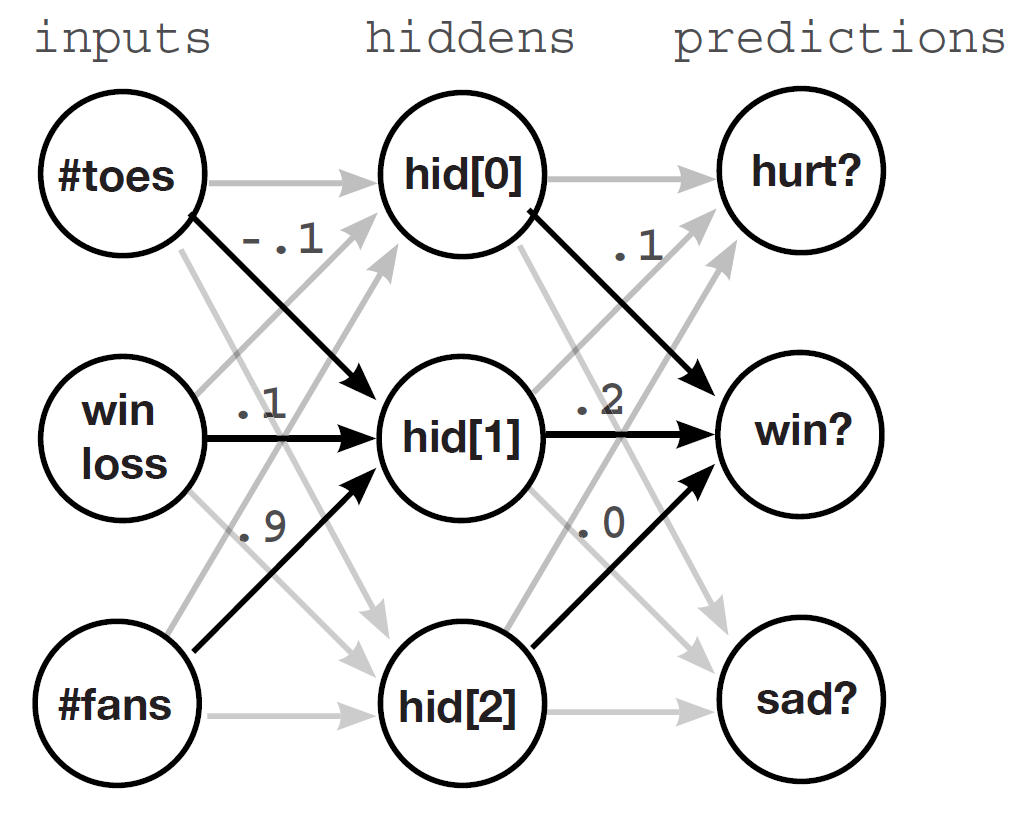

In [89]:
display.Image("./neural4.png")

In [91]:
            #toes %win #fans
ih_wgt = [ [0.1, 0.2, -0.1],#hid[0]
           [-0.1,0.1, 0.9], #hid[1]
           [0.1, 0.4, 0.1]  #hid[2]
         ]

        #   hid[0] hid[1] hid[2]
hp_wgt = [  [0.3, 1.1, -0.3],#hurt?
            [0.1, 0.2, 0.0], #win?
            [0.0, 1.3, 0.1] #sad?
         ]

weights = [ih_wgt, hp_wgt]

In [92]:
def neural_network(input, weights):
    hid = vect_mat_mul(input, weights[0])
    pred = vect_mat_mul(hid, weights[1])
    return pred

In [93]:
def vect_mat_mul(vect, matrix):
    a = vect
    b = matrix
    assert(len(a) == len(b))
    
    output = vector_of_zeros(len(vect)) 
     
    for i in range(len(vect)):
        output[i] = w_sum(vect, matrix[i])
        
    return output

In [94]:
def w_sum(a, b):
    assert(len(a) == len(b))
    output = 0 
    for i in range(len(a)):
        output += (a[i] * b[i])
    return output

In [95]:
def vector_of_zeros(num):
    zeros_list = []
    
    for i in range(num):
        zeros_list.append(0)
    return zeros_list

In [97]:
toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65,0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
# input corresponds to every entry
# for the fi rst game of the season
input = [toes[0], wlrec[0], nfans[0]]
pred = neural_network(input, weights)

In [98]:
pred

[0.21350000000000002, 0.14500000000000002, 0.5065]

# NUMPY VERSION

In [110]:
import numpy as np 

            #toes %win #fans
ih_wgt = [ [0.1, 0.2, -0.1],#hid[0]
           [-0.1,0.1, 0.9], #hid[1]
           [0.1, 0.4, 0.1]  #hid[2]
         ]

        #   hid[0] hid[1] hid[2]
hp_wgt = [  [0.3, 1.1, -0.3],#hurt?
            [0.1, 0.2, 0.0], #win?
            [0.0, 1.3, 0.1] #sad?
         ]

weights = [ih_wgt, hp_wgt]

In [111]:
def neural_network(input, weights):
    hid = input.dot(weights[0])
    pred = hid.dot(weights[1])
    return pred

In [112]:
toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65,0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

input = np.array([toes[0],wlrec[0],nfans[0]])
pred = neural_network(input,weights)

In [113]:

print(pred)

[ 0.496  1.256 -0.286]


# A Quick Primer on Numpy

In [1]:
import numpy as np
a = np.array([0,1,2,3]) #vector
b = np.array([4,5,6,7]) #another vector
c = np.array([ 
                [0,1,2,3], 
                [4,5,6,7]
             ]
            ) #matrix

d = np.zeros((2,4)) #(2x4 matrix of zeros)
e = np.random.rand(2,5) #(2,5)

In [2]:
a

array([0, 1, 2, 3])

In [3]:
b

array([4, 5, 6, 7])

In [4]:
c

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [5]:
d

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:
e

array([[0.81578221, 0.80726105, 0.11112148, 0.85756299, 0.23969629],
       [0.24244775, 0.33285003, 0.23841379, 0.36868178, 0.74595775]])

In [7]:
print(a*0.1)

[0.  0.1 0.2 0.3]


In [11]:
print('multiply elementwise : ',a*b)

multiply elementwise :  [ 0  5 12 21]


In [12]:
print(a*c)

[[ 0  1  4  9]
 [ 0  5 12 21]]


In [14]:
new_a = np.zeros((1,4))
print(new_a)

[[0. 0. 0. 0.]]


In [17]:
new_b = np.zeros((4,3))
print(new_b)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [18]:
a = np.zeros((2,4))
b = np.zeros((4,3))

c = a.dot(b)
print(c.shape)

(2, 3)


In [19]:
e = np.zeros((2,1))
f = np.zeros((1,3))

g = e.dot(f)
print(g.shape)

(2, 3)


In [20]:
# ".T" "flips" the rows and columns of a matrix
h = np.zeros((5,4)).T 
i = np.zeros((5,6))

j = h.dot(i)
print(j.shape)

(4, 6)
